In [ ]:
!gdown 1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa

Downloading...
From: https://drive.google.com/uc?id=1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa
To: /content/test_data_1.jpg
100% 835k/835k [00:00<00:00, 68.4MB/s]


In [ ]:
!pip install -q easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.9 MB/s eta 0:00:00


# Use EasyOCR to extract text

In [ ]:
import easyocr

def ocr_image(image_path):
    reader = easyocr.Reader(["en"])
    result = reader.readtext(image_path)
    return result

['CAC MAT HANG Vut', 'PuLULUL', 'BBAN: DO CHAY BIA NUOC NGOT', '816 805', '8865 712 70', 'XUAN', 'THANH PHO DONG XOAI', "DT:' 0328", 'Wic', 'D', '2 - KUAN LOC', 'PHUONG TAN', '{er iger', 'COSy', 'DIeM !', 'Wd', '4j', 'RINH XE Ve NHA', 'KhanG di#H', 'GCLTREng', '~eFUtuRE', 'LAELA', "'Ww-", 'Lamaeh WW=', 'Dlnn Heneken', 'BIA W', 'Heineken', 'BIA VIET', 'BIA VIET', 'Tger', 'BIAV', 'Heineken', 'BIA VIET', 'BIAE', 'Chdine', 'Heineken', 'BIAVIET', 'Tiger ', 'BIAV', 'Banc', 'Tiger', 'Tiger', 'BIAVIET', 'Choune', 'ChQLE', 'Heineken', 'BIA VIET', 'BIA', 'T3e', 'Tger |Heineken', 'Ho', 'BIAVI', 'B,Nc', 'Tiger_', 'Tiger', 'BIAVIET', 'G', 'Quuc', 'BIA VIET', 'Totr', 'Cuolpack"', 'Heineken', 'Mo ', 'BAN', 'BIA VIET', 'QubL', 'CNM', 'BIA VIET', 'BIA VIET', 'MUi', "Tiger'", "Tiger'", 'Goolpacit', 'Heineken', '350,000', 'BAN ', 'BIA VIET', 'ILoduna', 'cupln":_', 'BIA VIET', 'BIA VIET', 'MoI=', 'Tiger P', 'Tiger', 'Goolpach=', 'BAn_', 'Heineken]', 'BaMo)', 'BIRVIET', 'ChcA', 'BIA VIET', 'BIA VIET', 'Hoi

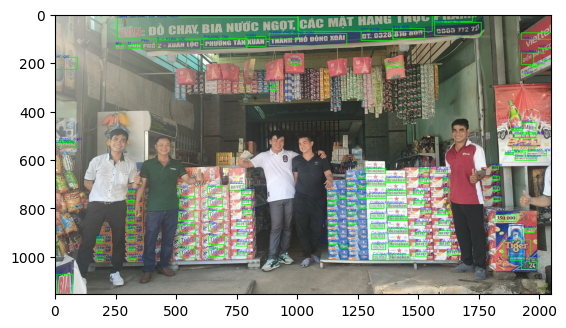

In [ ]:
import cv2
from matplotlib import pyplot as plt

img_path = "test_data_1.jpg"
mat = cv2.imread(img_path)
result = ocr_image(img_path)


boxes = [line[0] for line in result]
texts = [line[1] for line in result]
scores = [line[2] for line in result]

for box, text in zip(boxes, texts):
    top_left     = (int(box[0][0]), int(box[0][1]))
    bottom_right = (int(box[2][0]), int(box[2][1]))

    cv2.rectangle(mat, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(mat, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
print(texts)
plt.imshow(mat)

# Using image captioning model

In [ ]:
import cv2
from transformers import pipeline
from PIL import Image
import numpy as np

# Initialize the image captioning pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [ ]:
img = Image.open("/content/test_data_1.jpg").convert("RGB")

# Generate a description for the image
description = pipe(img)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
description

[{'generated_text': 'a group of men standing in front of a store'}]

# Using LLM to combine the result

In [ ]:
!pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


Các bạn lấy API key của Groq tại link này: [https://console.groq.com/keys](https://console.groq.com/keys)

In [ ]:
import os
from groq import Groq

client = Groq(
    # This is the default and can be omitted
    api_key="các bạn để API key vào đây",
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Hi! what can you do?",
        }
    ],
    model="llama3-8b-8192",
)
print(chat_completion.choices[0].message.content)

I'm glad you asked! I'm a large language model, which means I can understand and respond to human language in a conversational manner. Here are some things I can do:

1. **Answer questions**: I can provide information on a wide range of topics, from science and history to entertainment and culture.
2. **Generate text**: I can create text based on a prompt, topic, or style. This can be useful for writing articles, emails, or even creating content for social media.
3. **Translate text**: I can translate text from one language to another. I currently support translation for many languages, including popular languages like Spanish, French, German, Chinese, and more.
4. **Summarize text**: If you have a long piece of text and want to get a quick summary of it, I can help with that. I can summarize articles, documents, or even entire books.
5. **Generate ideas**: Stuck on a problem or need help generating ideas? I can assist with brainstorming and suggesting potential solutions.
6. **Chat an

In [ ]:
import requests
import json

def analyze_image_information(image_description, ocr_results):
    prompt = f"""
    Analyze the following image information and provide insights based on the criteria given below:

    Image Description:
    {image_description}

    OCR Results:
    {ocr_results}

    Criteria:
    1. Brand Logos: Identify any brand logos mentioned in the description or OCR results.
    2. Products: Mention any products such as beer kegs and bottles.
    3. Customers: Describe the number of customers, their activities, and emotions.
    4. Promotional Materials: Identify any posters, banners, and billboards.
    5. Setup Context: Determine the scene context (e.g., bar, restaurant, grocery store, or supermarket).

    Insights:
    """

    # Replace with your Groq API key

    client = Groq(
        # This is the default and can be omitted
        api_key="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",
    )


    data = {
        "model": "llama3-8b-8192",
        "messages": [{"role": "user", "content": prompt}]
    }

    chat_completion = client.chat.completions.create(**data)
    return chat_completion.choices[0].message.content

In [ ]:
image_description = description[0]['generated_text']
ocr_results = ' '.join(texts)

analysis = analyze_image_information(image_description, ocr_results)
print(analysis)

Based on the provided image information, here are the insights derived from the criteria:

**1. Brand Logos:**

* Heineken
* Tiger
* Viet Tien

**2. Products:**

* Beer kegs
* Beer bottles
* Beer packs
* Heineken beer
* Heineken bottles

**3. Customers:**

* A group of men standing in front of a store
* No specific customer activities or emotions mentioned, but the scene suggests a social gathering or meeting point

**4. Promotional Materials:**

* None mentioned explicitly, but the presence of beer-related products and brand logos suggests promotional materials might be present

**5. Setup Context:**

* The scene appears to be a outdoor setting in front of a store or a business, possibly a convenience store, grocery store, or a drinking establishment

Additional Insights:

* The OCR results contain a mix of Vietnamese and English text, which suggests that the image may be related to a Vietnamese context.
* The presence of multiple beer brands and products indicates a focus on beverage

# Simple streamlit app

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.217s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
%%writefile app.py
import streamlit as st
import easyocr
import numpy as np
from PIL import Image
import requests
import json
from transformers import pipeline
from groq import Groq

# Initialize the OCR reader
ocr_reader = easyocr.Reader(["en"])

def get_image_caption(image):
    # Use a pre-trained image captioning model from Salesforce
    caption_pipeline = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    return caption_pipeline(image)[0]['generated_text']

def perform_ocr(image):
    result = ocr_reader.readtext(np.array(image))
    ocr_texts = [line[1] for line in result]
    return ocr_texts

def analyze_image_information(image_description, ocr_results):
    prompt = f"""
    Analyze the following image information and provide insights based on the criteria given below:

    Image Description:
    {image_description}

    OCR Results:
    {ocr_results}

    Criteria:
    1. Brand Logos: Identify any brand logos mentioned in the description or OCR results.
    2. Products: Mention any products such as beer kegs and bottles.
    3. Customers: Describe the number of customers, their activities, and emotions.
    4. Promotional Materials: Identify any posters, banners, and billboards.
    5. Setup Context: Determine the scene context (e.g., bar, restaurant, grocery store, or supermarket).

    Insights:
    """

    # Replace with your Groq API key

    client = Groq(
        # This is the default and can be omitted
        api_key="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",
    )


    data = {
        "model": "llama3-8b-8192",
        "messages": [{"role": "user", "content": prompt}]
    }

    chat_completion = client.chat.completions.create(**data)
    return chat_completion.choices[0].message.content


# Streamlit app
st.set_page_config(layout="wide")
st.title("Image Analysis App")

# Create three columns with custom widths
col1, col2, col3 = st.columns([1, 2, 2])

with col1:
    st.header("Upload Image")
    uploaded_file = st.file_uploader("Choose an image file", type=["jpg", "jpeg", "png"])

with col2:
    st.header("OCR and Description")

    if uploaded_file is not None:
        # Load the image
        image = Image.open(uploaded_file).convert("RGB")
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Get image caption
        st.subheader("Image Description")
        image_description = get_image_caption(image)
        st.write(image_description)

        # # Perform OCR
        # st.subheader("OCR Texts")
        ocr_texts = perform_ocr(image)
        # for text in ocr_texts:
        #     st.write(text)

with col3:
    st.header("Analysis")

    if uploaded_file is not None:
        # Analyze image information
        ocr_results = ' '.join(ocr_texts)
        analysis = analyze_image_information(image_description, ocr_results)
        st.write(analysis)


Writing app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.172.146.2


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.338s
your url is: https://common-ears-invent.loca.lt
